Newton metoda 

In [1]:
#zadana data
x = [-1, 0, 2, 3]
f = [-1, 5, 5, 23]

In [2]:
from numpy import poly, flip, sqrt, round_, convolve, zeros, sum
from numpy import array, r_, transpose, linalg, linspace
from matplotlib.pyplot import figure, scatter, plot, show, legend

In [3]:
# funkce pro overeni podminek
def podminky(x, f):
    # musi byt stejny pocet xi a fi
    if len(x) != len(f):
        raise Exception('Neni stejny pocet uzlu a funkcnich hodnot') 

    for a in x:
        # vsechny xi musi byt unikatni
        if x.count(a) > 1:
            raise Exception('Existuji stejne uzly')

pomerna diference 

In [4]:
#nepotrebna, pouze pomerna diference prvniho radu
def pomerna_dif(i, j):
    
    #podminka 
    if i > len(x) or j > len(x):
        raise Exception(" nemuzete indexem preskocit pole")
    
    if i >= j:
        raise Exception("indexy nesplnuji podminku")
        
        
    pd = (f[j] - f[i]) / (x[j] - x[i])     
    return pd

In [5]:
pomerna_dif(0,1)

6.0

#pomerna diference k-teho radu 

In [6]:
#pomerna diference k-teho radu
def pomerna_dif_k(i, n, xx = x, ff = f):
    #if k != len(x) or k < 2:
     #   raise Exception("neodpovida velikosti uzlu")
    k = n - i
    pdk = 0
    for j in range (0, k + 1):
        jmenovatel = 1
        citatel = 0
        for m in range (0, k + 1):
            if j != m:
                jmenovatel = jmenovatel * (xx[i + j] - xx[i + m])
        citatel = citatel + ff[i + j]
        pdk = pdk + (citatel / jmenovatel)
        #print(pdk, citatel, jmenovatel)
        
    return pdk  

In [7]:
pomerna_dif_k(0,2)

-2.0

In [8]:
pomerna_dif_k(0,1)

6.0

newtonuv interpolacni polynom 

In [9]:
import numpy as np
from numpy import poly, flip, sqrt, round_, convolve, zeros, sum

In [10]:
# seznam vsech pomernych diferenci 
def vrat_seznam_diferenci(hodnoty, f):
    diference_seznam = []
    for i in range(1, len(hodnoty)):
        diference_seznam.append (pomerna_dif_k(0, i, hodnoty, f))

    return diference_seznam

seznam_diferenci = vrat_seznam_diferenci(x, f)
#print("seznam_diferenci:", seznam_diferenci)



#vraci koeficienty jednotivych polynomů  
def vrat_koeficienty_polynomu(hodnoty):
    polynom = []
    koreny = []
    for i in range(len(hodnoty) - 1):
        koreny.append(hodnoty[i])
        polynom.append(np.poly(koreny))
    #polynom.append(np.poly(hodnoty[0:-1]))
    return polynom
       
polynomy = vrat_koeficienty_polynomu(x)
#print("polynomy:", polynomy)



#scitani koeficientu polynomu
def secti_polynomy(polynomy, f0):
    result2 = [f0]    #pricteni f[0] 
    for j in polynomy:
        j_size = len(j)
        result2.append(0)
        for l in range(len(j)):
            result2[l] = result2[l] + j[j_size-l-1]

    return result2


scitani_polynomu = secti_polynomy(polynomy, f[0])
#print("scitani_polynomu", scitani_polynomu)



#konecny newtonuv polynom
def Newton(polynomy, diference, f0):        
    result = []
    arr_len = len(polynomy)

    # appendne do resultu polynom vynasobeny diferenci
    for i in range(0, arr_len):
        actual_polynom = polynomy[i]
        actual_diference = diference[i]

        # vynasobi kazdy prvek polynomu diferenci
        vysledny_polynom = [j * actual_diference for j in actual_polynom]
        result.append(vysledny_polynom)

    return secti_polynomy(result, f0)



isaak = Newton(polynomy, seznam_diferenci, f[0])
#print("isaak:", isaak)
                

In [11]:
# funkce pro vysledek napsany jako text
def slova(a):
    print(f'Hledany interpolacni polynom ma tvar P(r) =', end='')
    # trochu zbytecny cyklus pro vypsani polynomu
    for i in reversed(range(len(a))):
        if (a[i] > 0 and i != len(a)-1):
            print(f' + {int(a[i])}*x^{i}', end='') # funkce int zaokrouhluje na cela cisla (vhodna jenom pro tento priklad)
        elif a[i] == 0:
            print(f'', end='')
        elif a[i] == -1:
            print(f' - x^{i}', end='')
        elif a[i] < 0:
            print(f' - {abs(int(a[i]))}*x^{i}', end='')
        else:
            print(f' {int(a[len(a)-1])}*x^{len(a)-1}', end='')

In [12]:
slova(isaak)       

Hledany interpolacni polynom ma tvar P(r) = 2*x^3 - 4*x^2 + 5*x^0

In [13]:
# funkce pro vykresleni grafu
def interplot(xi, fi, interpol):
    x = linspace (min(xi)-0.5, max(xi)+0.5, 50) # 100 bodu na ose x
    y = 0

    for i, num in enumerate(interpol):
        y = y + num * x**i 
        #print(y)# vypocet y podle zadane funkce
    
    figure(figsize=(10,6)) # velikost grafu
    scatter(xi, fi, color='red', marker='x', s=200, linewidth=2, label='uzly interpolace') # vykresleni uzlu
    plot(x, y, color='blue', linewidth=2, label='interpolacni polynom') # vykresleni krivky
    legend()
    show()

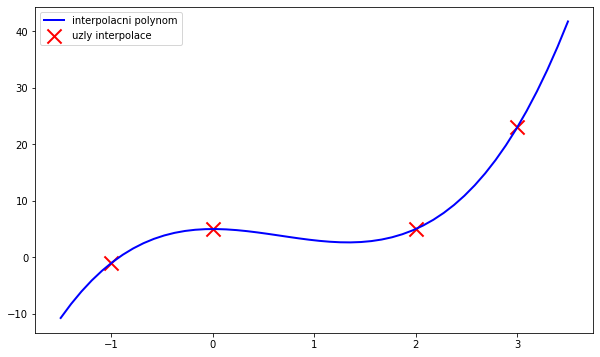

In [14]:
interplot(x, f, isaak)

absolutni hodnota

In [15]:
def vytvor_definicni_obor(od, do, h):
    xx = [do]
    ff = [abs(do)]
    skok =  abs(od - do) / h
    for n in np.arange(od, do, skok):
        xx.append(n)
        ff.append(abs(n))
    return(xx, ff)

In [16]:
xx1, ff1 = vytvor_definicni_obor(-1.0, 1.0, 5.0)
xx2, ff2 = vytvor_definicni_obor(-1.0, 1.0, 8.0)



def Newton_final(xx, ff):
    seznam_diferenci2 = vrat_seznam_diferenci(xx, ff)
    #print("seznam_diferenci2", seznam_diferenci2)

    seznam_polynomu = vrat_koeficienty_polynomu(xx)
    #print("seznam_polynomu", seznam_polynomu)

    result = Newton(seznam_polynomu, seznam_diferenci2, ff[0]) 
    #print("isaak1",isaak1)
    
    return result
   



isaak1 = Newton_final(xx1, ff1)
isaak2 = Newton_final(xx2, ff2)

slova(isaak1)

Hledany interpolacni polynom ma tvar P(r) = 0*x^5 - 0*x^4 - 0*x^3 + 1*x^2 - 0*x^1 + 0*x^0

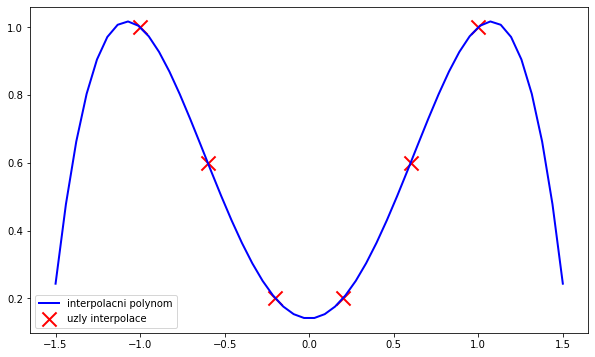

In [17]:
interplot(xx1, ff1, isaak1)

In [18]:
# funkce pro vykresleni grafu
def interplot2(xi, fi, xj, fj, interpol1, interpol2):
    x = linspace (min(xi), max(xi), 100) # 100 bodu na ose x
    y1 = 0
    y2 = 0
    

    for i, num in enumerate(interpol1):
        y1 = y1 + num * x**i
        
    for i, num in enumerate(interpol2):
        y2 = y2 + num * x**i
        

    figure(figsize=(10,6)) # velikost grafu
    scatter(xi, fi, color='red', marker='x', s=200, linewidth=2, label='uzly interpolace') # vykresleni uzlu
    scatter(xj, fj, color='red', marker='x', s=200, linewidth=2, label='uzly interpolace') # vykresleni uzlu
    plot(x, y1, color='blue', linewidth=2, label='interpolacni polynom')  # vykresleni krivky
    plot(x, y2, color='green', linewidth=2, label='interpolacni polynom') 
    legend()
    show()

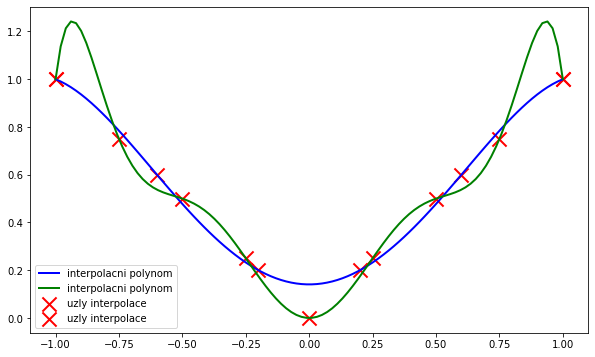

In [19]:
interplot2(xx1, ff1, xx2,  ff2, isaak1, isaak2)

RUNGE

In [20]:
def vytvor_definicni_obor_runge(od, do, h):
    x_runge = []
    f_runge = []
    skok =  abs(od - do) / h
    for n in np.arange(od, do, skok):
        x_runge.append(n)
        f_runge.append(1 / (1 + 25 * n ** 2))
    return(x_runge + [1], f_runge + [1 / 26])



In [21]:
x_runge, f_runge = vytvor_definicni_obor_runge(-1.0, 1.0, 6.0)
runge_function = Newton_final(x_runge, f_runge)
#slova(runge_function)

In [22]:
# funkce pro vykresleni grafu
def interplot(xi, fi, interpol):
    x = linspace (min(xi), max(xi), 100) # 100 bodu na ose x
    y = 0

    for i, num in enumerate(interpol):
        y = y + num * x**i 
        #print(y)# vypocet y podle zadane funkce
    
    figure(figsize=(10,6)) # velikost grafu
    scatter(xi, fi, color='red', marker='x', s=150, linewidth=2, label='uzly interpolace') # vykresleni uzlu
    plot(x, y, color='blue', linewidth=2, label='interpolacni polynom') # vykresleni krivky
    legend()
    show()
    

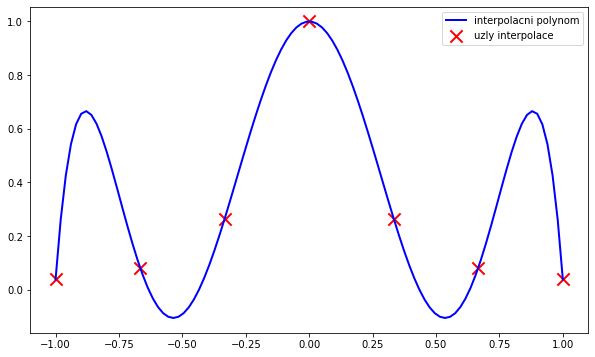

In [23]:
interplot(x_runge, f_runge, runge_function)

In [24]:
x_runge9, f_runge9 = vytvor_definicni_obor_runge(-1.0, 1.0, 11.0)
runge_function9 = Newton_final(x_runge9, f_runge9)

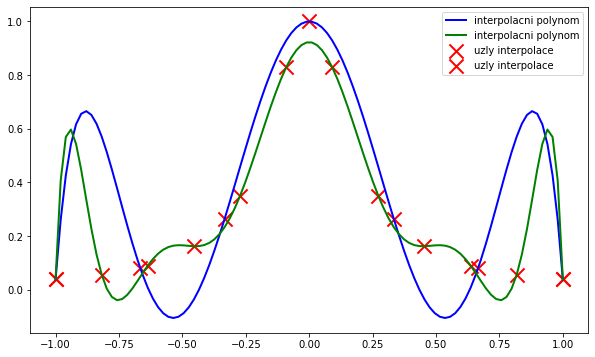

In [25]:
interplot2(x_runge, f_runge, x_runge9, f_runge9, runge_function, runge_function9)